# TENSORFLOW PART

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [2]:
#Dataset
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()
#Normalize pixel values to be between 0 and 1
train_images,test_images=train_images/255.0,test_images/255.0

170498071/170498071 [==============================] - 2s 0us/step


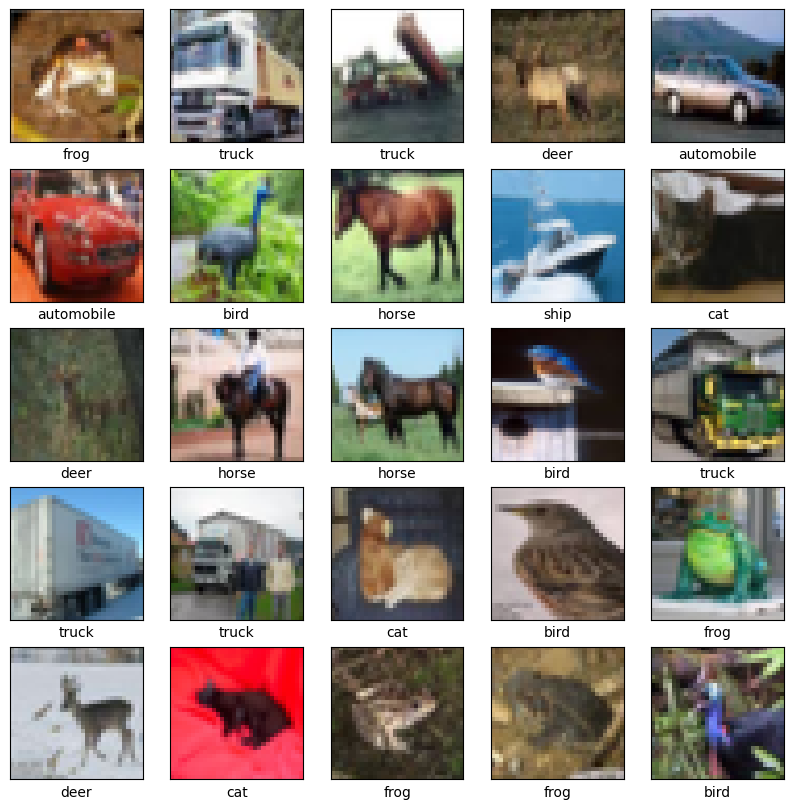

In [3]:
classes=('airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck')
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(classes[train_labels[i][0]])
plt.show()

In [4]:
#Model
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))


In [5]:
#Compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
#Training
history = model.fit(train_images,train_labels,epochs=10,validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 33s 12ms/step - loss: 1.6210 - accuracy: 0.4040 - val_loss: 1.3776 - val_accuracy: 0.4982
Epoch 2/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.2786 - accuracy: 0.5414 - val_loss: 1.1876 - val_accuracy: 0.5804
Epoch 3/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.1237 - accuracy: 0.6032 - val_loss: 1.0592 - val_accuracy: 0.6306
Epoch 4/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.0166 - accuracy: 0.6421 - val_loss: 0.9937 - val_accuracy: 0.6570
Epoch 5/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.9374 - accuracy: 0.6693 - val_loss: 0.9636 - val_accuracy: 0.6641
Epoch 6/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.8758 - accuracy: 0.6908 - val_loss: 0.9264 - val_accuracy: 0.6780
Epoch 7/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.8305 - accuracy: 0.7055 - val_loss: 0.9286 - val_accurac

In [7]:
import time
# Your model compilation and training code
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Record the start time
start_time = time.time()


history = model.fit(train_images,train_labels,epochs=10,validation_split=0.2)
# Record the end time
end_time = time.time()

# Calculate the total time taken for training
total_time = end_time - start_time

# Print the total time taken
print(f"Total time taken for training: {total_time} seconds")


Epoch 1/10
1250/1250 [==============================] - 12s 8ms/step - loss: 0.6797 - accuracy: 0.7610 - val_loss: 0.9077 - val_accuracy: 0.6985
Epoch 2/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.6485 - accuracy: 0.7706 - val_loss: 0.9015 - val_accuracy: 0.7009
Epoch 3/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.6185 - accuracy: 0.7812 - val_loss: 0.9095 - val_accuracy: 0.6991
Epoch 4/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.5902 - accuracy: 0.7893 - val_loss: 0.8823 - val_accuracy: 0.7103
Epoch 5/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.5656 - accuracy: 0.7998 - val_loss: 0.9217 - val_accuracy: 0.7018
Epoch 6/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.5384 - accuracy: 0.8071 - val_loss: 0.9329 - val_accuracy: 0.6976
Epoch 7/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.5124 - accuracy: 0.8172 - val_loss: 0.9536 - val_accuracy

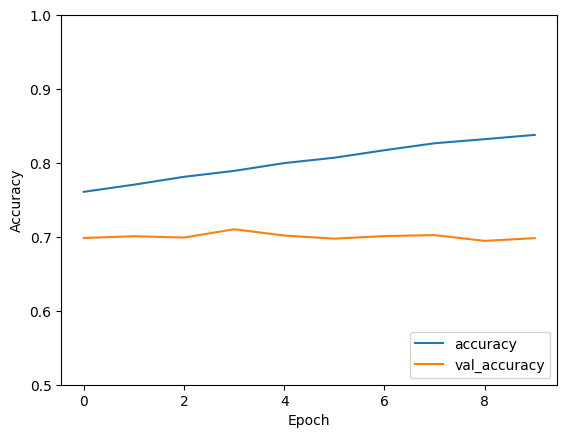

In [8]:
#plot history
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')


In [9]:
#Evaluate
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print(test_loss,test_acc)

313/313 - 1s - loss: 1.0066 - accuracy: 0.7014 - 1s/epoch - 3ms/step
1.0065691471099854 0.7013999819755554


In [10]:
# Create a MirroredStrategy.
strategy = tf.distribute.MirroredStrategy()

print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

# Open a strategy scope.
with strategy.scope():
    # Create and compile the model within the strategy scope.
    #Model
    model=models.Sequential()
    model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64,(3,3),activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64,(3,3),activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(10))
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
import time

# Now you can train the model using the `fit` method as usual.
start_time = time.time()

history = model.fit(train_images,train_labels,epochs=10,validation_split=0.2)
end_time = time.time()

# Calculate the total time taken for training
total_time = end_time - start_time

# Print the total time taken
print(f"Total time taken for training: {total_time} seconds")

Number of devices: 1
Epoch 1/10
1250/1250 [==============================] - 11s 8ms/step - loss: 1.5964 - accuracy: 0.4149 - val_loss: 1.3458 - val_accuracy: 0.5135
Epoch 2/10
1250/1250 [==============================] - 10s 8ms/step - loss: 1.2659 - accuracy: 0.5492 - val_loss: 1.2031 - val_accuracy: 0.5794
Epoch 3/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1104 - accuracy: 0.6078 - val_loss: 1.1098 - val_accuracy: 0.6017
Epoch 4/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.9996 - accuracy: 0.6482 - val_loss: 1.0144 - val_accuracy: 0.6457
Epoch 5/10
1250/1250 [==============================] - 9s 8ms/step - loss: 0.9233 - accuracy: 0.6756 - val_loss: 0.9868 - val_accuracy: 0.6574
Epoch 6/10
1250/1250 [==============================] - 8s 7ms/step - loss: 0.8541 - accuracy: 0.7015 - val_loss: 0.9564 - val_accuracy: 0.6687
Epoch 7/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.7970 - accuracy: 0.7189 - val_loss:

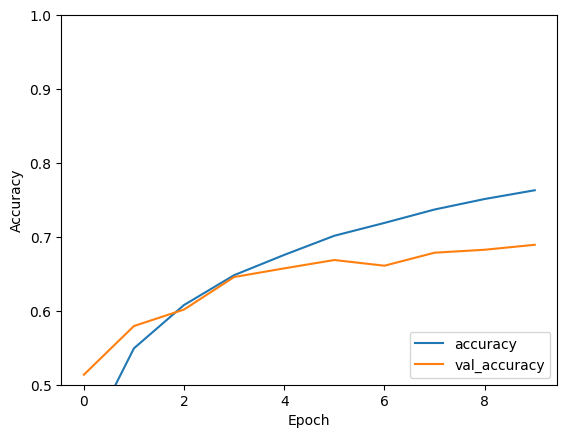

In [11]:
#plot history
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')



In [12]:
#Evaluate
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print(test_loss,test_acc)

313/313 - 1s - loss: 0.9722 - accuracy: 0.6826 - 1s/epoch - 4ms/step
0.9721764922142029 0.6826000213623047


#PYTORCH PART

In [34]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

In [35]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [36]:
#Hyperparameter
batch_size=32

In [37]:
#Dataset and Dataloader

transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset=torchvision.datasets.CIFAR10(root='./data', train=True,
                                      download=True, transform=transform)
trainloader=torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                        shuffle=True, num_workers=2)
testset=torchvision.datasets.CIFAR10(root='./data', train=False,
                                     download=True, transform=transform)
testloader=torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                       shuffle=False, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


In [38]:
# #Plot
# classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog',
#            'frog', 'horse', 'ship', 'truck')

# def imshow(imgs):
#   imgs = imgs/2 + 0.5 #unnormalize
#   npimgs=imgs.numpy()
#   plt.imshow(np.transpose(npimgs, (1, 2, 0)))
#   plt.show()

# # one batch of random training images

# dataiter = iter(trainloader)
# images, labels = dataiter.next()

# img_grid=torchvision.utils.make_grid (images [0:25], nrow=5)
# imshow(img_grid)
# print(''.join(f'{classes [labels [j]]:5s}' for j in range(25)))

In [39]:
#Model
class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(3,32,3)
    self.pool=nn.MaxPool2d(2,2)
    self.conv2=nn.Conv2d(32,64,3)
    self.conv3=nn.Conv2d(64,64,3)
    self.fc1=nn.Linear(64*4*4,64)
    self.fc2=nn.Linear(64,10)
  def forward(self,x):
    x=F.relu(self.conv1(x))
    x=self.pool(x)
    x=F.relu(self.conv2(x))
    x=self.pool(x)
    x=F.relu(self.conv3(x))
    x=torch.flatten(x,1)
    x=F.relu(self.fc1(x))
    x=self.fc2(x)
    return x
model=ConvNet().to(device)


In [40]:
 #Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

[1] loss: 1.498, Train Accuracy: 0.452
Validation Accuracy: 0.548
[2] loss: 1.142, Train Accuracy: 0.593
Validation Accuracy: 0.635
[3] loss: 0.973, Train Accuracy: 0.657
Validation Accuracy: 0.653
[4] loss: 0.874, Train Accuracy: 0.694
Validation Accuracy: 0.671
[5] loss: 0.801, Train Accuracy: 0.719
Validation Accuracy: 0.705
[6] loss: 0.740, Train Accuracy: 0.741
Validation Accuracy: 0.706
[7] loss: 0.692, Train Accuracy: 0.757
Validation Accuracy: 0.718
[8] loss: 0.654, Train Accuracy: 0.770
Validation Accuracy: 0.726
[9] loss: 0.614, Train Accuracy: 0.784
Validation Accuracy: 0.719
[10] loss: 0.580, Train Accuracy: 0.795
Validation Accuracy: 0.732
Finished Training
Total time taken for training: 243.41394925117493 seconds


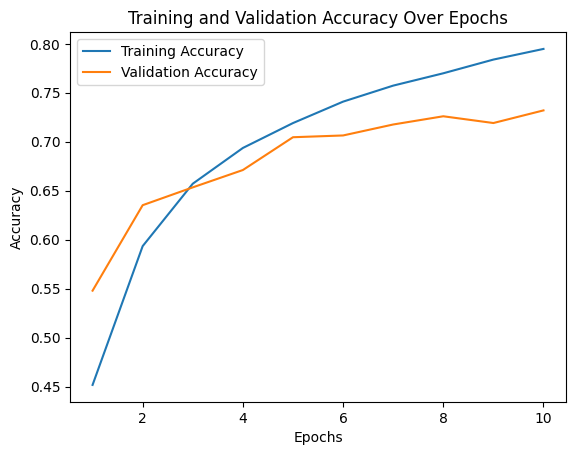

In [41]:
import time

# Lists to store accuracy values
train_accuracy_list = []
val_accuracy_list = []

# Record the start time
start_time = time.time()

steps_per_epoch = len(trainloader)
for epoch in range(10):
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = correct_train / total_train
    train_accuracy_list.append(train_accuracy)

    print(f'[{epoch + 1}] loss: {running_loss / steps_per_epoch:.3f}, Train Accuracy: {train_accuracy:.3f}')

    # Validation
    model.eval()
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

        val_accuracy = correct_val / total_val
        val_accuracy_list.append(val_accuracy)

        print(f'Validation Accuracy: {val_accuracy:.3f}')

# Record the end time
end_time = time.time()

# Calculate the total time taken for training
total_time = end_time - start_time
print('Finished Training')

# Print the total time taken
print(f"Total time taken for training: {total_time} seconds")

# Plotting
epochs = range(1, 11)  # Assuming 10 epochs
plt.plot(epochs, train_accuracy_list, label='Training Accuracy')
plt.plot(epochs, val_accuracy_list, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()



In [42]:
#Evaluate
n_correct=0
n_total=0
model.eval()
with torch.no_grad():
  for (images,labels) in testloader:
    images=images.to(device)
    labels=labels.to(device)
    outputs=model(images)
    #take class with highest value as prediction
    _,predicted=torch.max(outputs.data,1)

    n_total+=labels.size(0)
    n_correct+=(predicted==labels).sum().item()

print(f'Accuracy on test set:{n_correct/n_total:.3f}')

Accuracy on test set:0.732


In [20]:
#Training
import time

# Record the start time
start_time = time.time()

steps_per_epoch=len(trainloader)
for epoch in range(10):
  running_loss=0.0
  for (inputs,labels) in trainloader:
    inputs=inputs.to(device)
    labels=labels.to(device)
    #forward+loss
    outputs=model(inputs)
    loss=criterion(outputs,labels)
    #backward + optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss+=loss.item()
  print(f'[{epoch+1}] loss: {running_loss/steps_per_epoch:.3f}')
# Record the end time
end_time = time.time()

# Calculate the total time taken for training
total_time = end_time - start_time
print('Finished Training')
# Print the total time taken
print(f"Total time taken for training: {total_time} seconds")


[1] loss: 1.489
[2] loss: 1.134
[3] loss: 0.983
[4] loss: 0.882
[5] loss: 0.805
[6] loss: 0.746
[7] loss: 0.698
[8] loss: 0.657
[9] loss: 0.616
[10] loss: 0.582
Finished Training
Total time taken for training: 210.4269585609436 seconds


In [21]:
#Evaluate
n_correct=0
n_total=0
model.eval()
with torch.no_grad():
  for (images,labels) in testloader:
    images=images.to(device)
    labels=labels.to(device)
    outputs=model(images)
    #take class with highest value as prediction
    _,predicted=torch.max(outputs.data,1)

    n_total+=labels.size(0)
    n_correct+=(predicted==labels).sum().item()

print(f'Accuracy on test set:{n_correct/n_total:.3f}')

Accuracy on test set:0.707


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

In [ ]:
#Hyperparameter
batch_size=32

In [ ]:
#Dataset and Dataloader

transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset=torchvision.datasets.CIFAR10(root='./data', train=True,
                                      download=True, transform=transform)
trainloader=torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                        shuffle=True, num_workers=2)
testset=torchvision.datasets.CIFAR10(root='./data', train=False,
                                     download=True, transform=transform)
testloader=torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                       shuffle=False, num_workers=2)

In [ ]:
#Model
class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(3,32,3)
    self.pool=nn.MaxPool2d(2,2)
    self.conv2=nn.Conv2d(32,64,3)
    self.conv3=nn.Conv2d(64,64,3)
    self.fc1=nn.Linear(64*4*4,64)
    self.fc2=nn.Linear(64,10)
  def forward(self,x):
    x=F.relu(self.conv1(x))
    x=self.pool(x)
    x=F.relu(self.conv2(x))
    x=self.pool(x)
    x=F.relu(self.conv3(x))
    x=torch.flatten(x,1)
    x=F.relu(self.fc1(x))
    x=self.fc2(x)
    return x
model=ConvNet().to(device)

In [ ]:
 #Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

In [23]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

# Check if CUDA is available and select device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# Hyperparameter
batch_size = 32

# Dataset and Dataloader
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# Model
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d(64, 64, 3)
        self.fc1 = nn.Linear(64 * 4 * 4, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Wrap the model with DataParallel
model = ConvNet().to(device)
model = nn.DataParallel(model)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training
import time

# Record the start time
start_time = time.time()

steps_per_epoch = len(trainloader)
for epoch in range(10):
    running_loss = 0.0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward + Loss
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward + Optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'[{epoch + 1}] loss: {running_loss / steps_per_epoch:.3f}')

# Record the end time
end_time = time.time()

# Calculate the total time taken for training
total_time = end_time - start_time
print('Finished Training')

# Print the total time taken
print(f"Total time taken for training: {total_time} seconds")

# Evaluate
n_correct = 0
n_total = 0
model.eval()

with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)

        # Take class with the highest value as prediction
        _, predicted = torch.max(outputs.data, 1)

        n_total += labels.size(0)
        n_correct += (predicted == labels).sum().item()

print(f'Accuracy on the test set: {n_correct / n_total:.3f}')


cuda
Files already downloaded and verified
Files already downloaded and verified
[1] loss: 1.517
[2] loss: 1.137
[3] loss: 0.961
[4] loss: 0.851
[5] loss: 0.771
[6] loss: 0.711
[7] loss: 0.653
[8] loss: 0.614
[9] loss: 0.576
[10] loss: 0.537
Finished Training
Total time taken for training: 240.01444792747498 seconds
Accuracy on the test set: 0.720


cuda
Files already downloaded and verified
Files already downloaded and verified
[1] loss: 1.473, Train Accuracy: 0.464
Validation Accuracy: 0.559
[2] loss: 1.099, Train Accuracy: 0.611
Validation Accuracy: 0.638
[3] loss: 0.942, Train Accuracy: 0.669
Validation Accuracy: 0.665
[4] loss: 0.842, Train Accuracy: 0.704
Validation Accuracy: 0.695
[5] loss: 0.765, Train Accuracy: 0.731
Validation Accuracy: 0.718
[6] loss: 0.706, Train Accuracy: 0.750
Validation Accuracy: 0.714
[7] loss: 0.660, Train Accuracy: 0.769
Validation Accuracy: 0.720
[8] loss: 0.613, Train Accuracy: 0.784
Validation Accuracy: 0.725
[9] loss: 0.576, Train Accuracy: 0.796
Validation Accuracy: 0.724
[10] loss: 0.536, Train Accuracy: 0.811
Validation Accuracy: 0.717
Finished Training
Total time taken for training: 253.1970956325531 seconds


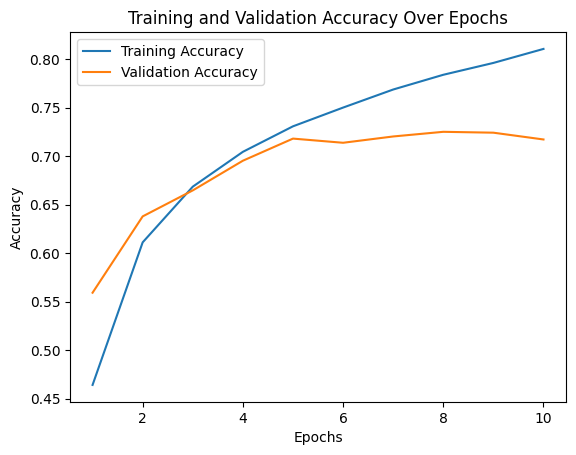

In [43]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import time

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# Hyperparameter
batch_size = 32

# Dataset and Dataloader
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# Model
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d(64, 64, 3)
        self.fc1 = nn.Linear(64 * 4 * 4, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Wrap the model with DataParallel
model = ConvNet().to(device)
model = nn.DataParallel(model)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store accuracy values
train_accuracy_list = []
val_accuracy_list = []

# Record the start time
start_time = time.time()

steps_per_epoch = len(trainloader)
for epoch in range(10):
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = correct_train / total_train
    train_accuracy_list.append(train_accuracy)

    print(f'[{epoch + 1}] loss: {running_loss / steps_per_epoch:.3f}, Train Accuracy: {train_accuracy:.3f}')

    # Validation
    model.eval()
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_accuracy = correct_val / total_val
    val_accuracy_list.append(val_accuracy)

    print(f'Validation Accuracy: {val_accuracy:.3f}')

# Record the end time
end_time = time.time()

# Calculate the total time taken for training
total_time = end_time - start_time
print('Finished Training')

# Print the total time taken
print(f"Total time taken for training: {total_time} seconds")

# Plotting
epochs = range(1, 11)  # Assuming 10 epochs
plt.plot(epochs, train_accuracy_list, label='Training Accuracy')
plt.plot(epochs, val_accuracy_list, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()


In [44]:
#Evaluate
n_correct=0
n_total=0
model.eval()
with torch.no_grad():
  for (images,labels) in testloader:
    images=images.to(device)
    labels=labels.to(device)
    outputs=model(images)
    #take class with highest value as prediction
    _,predicted=torch.max(outputs.data,1)

    n_total+=labels.size(0)
    n_correct+=(predicted==labels).sum().item()

print(f'Accuracy on test set:{n_correct/n_total:.3f}')

Accuracy on test set:0.717
